In [1]:
import sys
from pathlib import Path
root = Path().resolve().parent.parent
sys.path.append(str(root))  # Add the root of the project to the local path

In [2]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from linear_models import *

%load_ext autoreload
%autoreload 2

/home/kenflat2/NS-Map/experiments/linear/parameters_linear.json


# Evaluate Nonstationarity Test on Different Types of Nonstationarity

In [3]:
with open("parameters_linear.json", "r") as f:
    params = json.load(f)

Function 'generate_autoregressive' found.


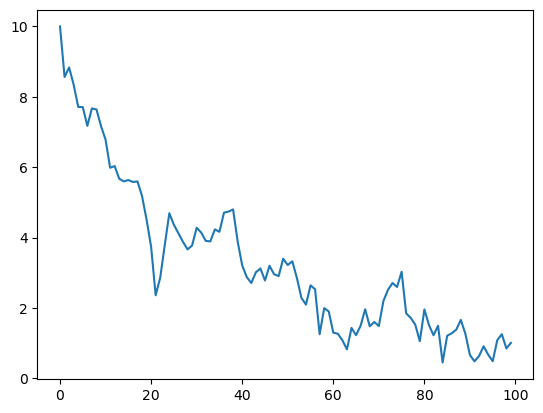

In [18]:
function_name = "generate_"+params["experiments"][6]["name"]
generate_function = globals().get(function_name)

if generate_function:
    print(f"Function '{function_name}' found.")
else:
    print(f"Function '{function_name}' not found.")

plt.plot(generate_function())

FileNotFoundError: autoregressive.csv not found.

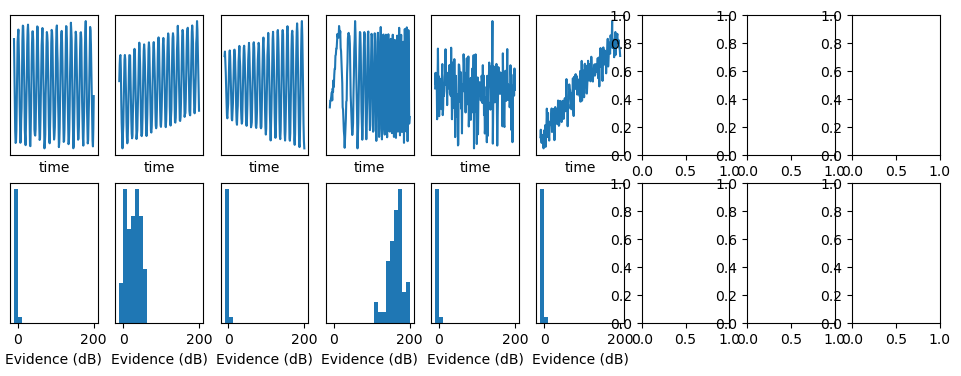

In [15]:
fig, ax = plt.subplots(2, len(params["experiments"]), figsize=(12, 4))

for i, para in enumerate(params["experiments"]):
    data = np.loadtxt(f"{para['name']}.csv", delimiter=",")

    function_name = f"generate_{para['name']}"
    generate_function = globals().get(function_name)

    ax[0, i].plot(generate_function())
    ax[0, i].set_yticks([])
    ax[0, i].set_xticks([])
    ax[0, i].set_xlabel("time")
    ax[1, i].hist(data[:, 0], bins=20, range=(-10, 200))
    ax[1, i].set_yticks([])
    ax[1, i].set_xlabel("Evidence (dB)")

ax[0, 0].set_ylabel("Simulated data")
ax[1, 0].set_ylabel("Frequency")

plt.tight_layout()

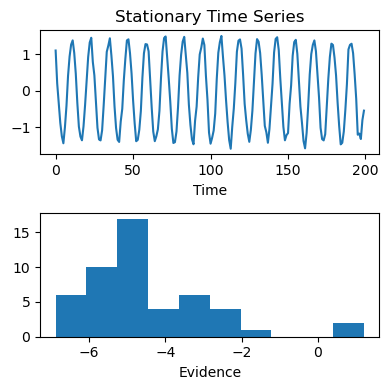

In [ ]:
# Plot the time series on the first subplot
ax[0].plot(generate_stationary_linear())
ax[0].set_title("Stationary Time Series")
ax[0].set_xlabel("Time")
# ax[0].set_ylabel("Value")

# Plot the histogram on the second subplot
ax[1].hist(stationary_data[:, 0], alpha=1.0)
ax[1].set_xlabel("Evidence")

plt.tight_layout()
plt.show()

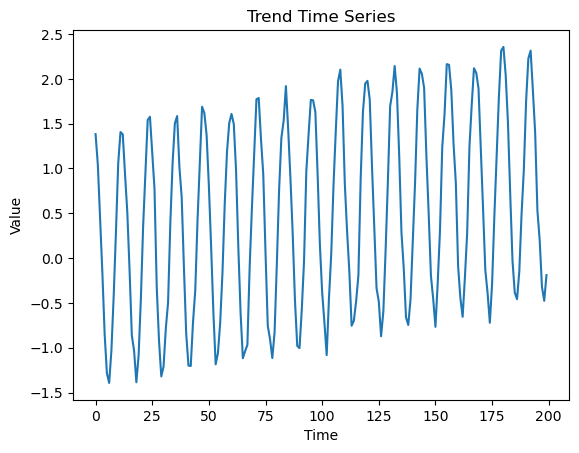

In [62]:
# Plot an example time series from the stationary case

plt.plot(generate_nonstationary_trend_linear())
plt.title("Trend Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

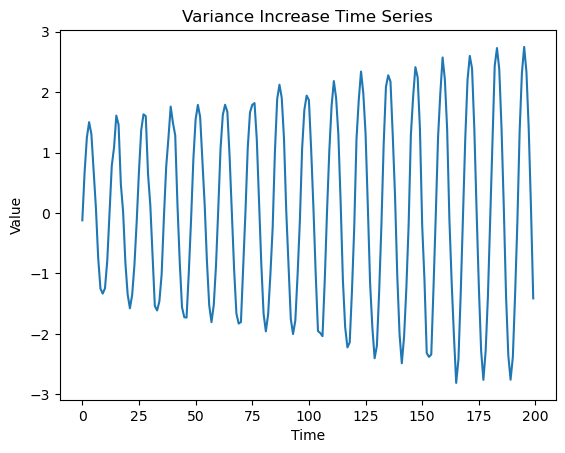

In [66]:
# Plot an example time series from the nonstationary case with increasing variance
plt.plot(generate_nonstationary_variance_increase_linear())
plt.title("Variance Increase Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

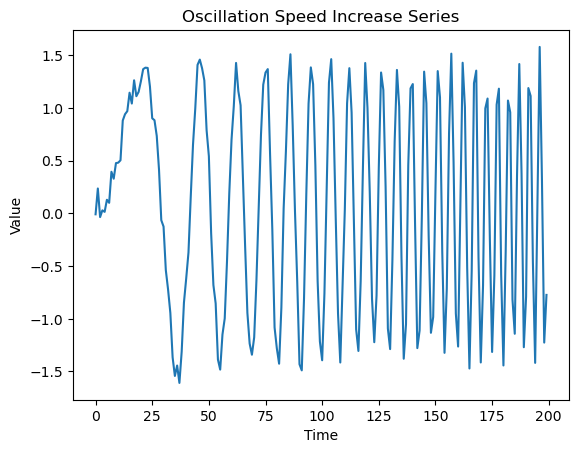

In [69]:
# Plot an example time series from the nonstationary case with increasing variance
plt.plot(generate_nonstationary_oscillation_speed_linear())
plt.title("Oscillation Speed Increase Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

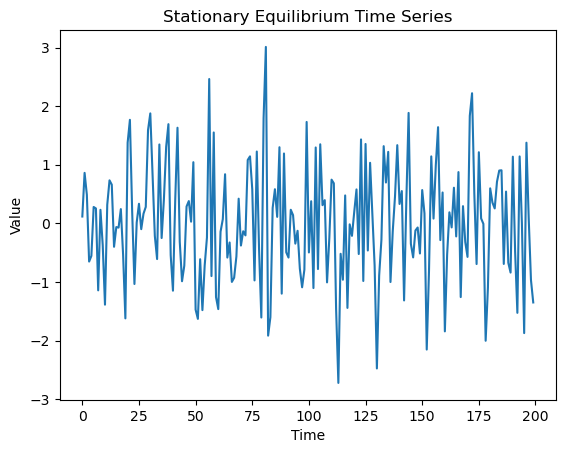

In [73]:
# Plot an example time series from the nonstationary case with increasing variance
plt.plot(generate_stationary_equilibrium())
plt.title("Stationary Equilibrium Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

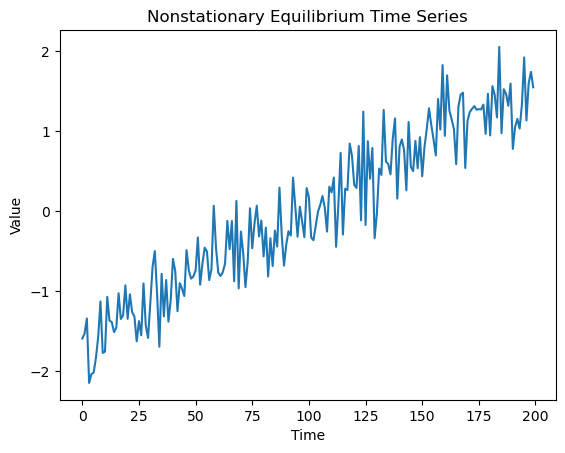

In [76]:
# Plot an example time series from the nonstationary case with increasing variance
plt.plot(generate_nonstationary_equilibrium_trend())
plt.title("Nonstationary Equilibrium Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [202]:
# Results

table = np.loadtxt("../results/linear_results/equilibrium_mean_change_process_noise.csv", delimiter=",")
print(f"Proportion of nonstationary equilibrium Ricker classified as nonstationary: {np.mean(table[:,0] > 0.1)}")

table = np.loadtxt("../results/linear_results/equilibrium_process_noise.csv", delimiter=",")
print(f"Proportion of stationary equilibrium Ricker classified as stationary: {np.mean(table[:,0] < 0.1)}")

Proportion of nonstationary equilibrium Ricker classified as nonstationary: 1.0
Proportion of stationary equilibrium Ricker classified as stationary: 0.71


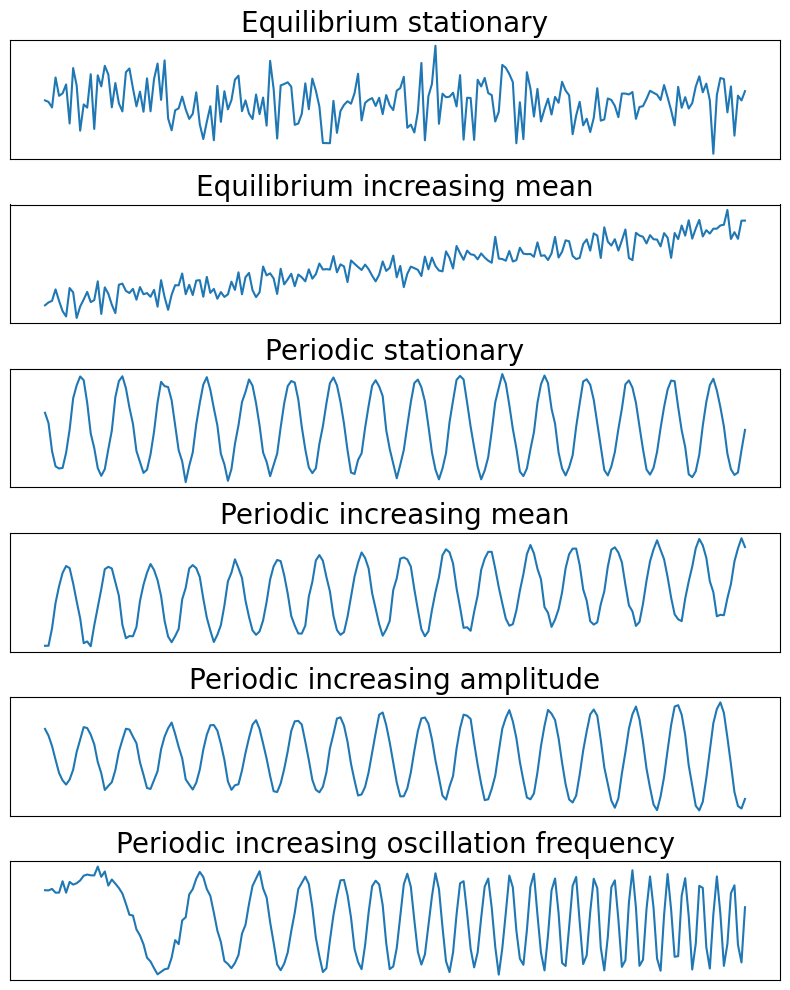

In [77]:
fig, ax = plt.subplots(6,figsize=(8,10))

ax[0].plot(generate_stationary_equilibrium())
ax[0].set_title("Equilibrium stationary", fontsize = 20)
ax[1].plot(generate_nonstationary_equilibrium_trend())
ax[1].set_title("Equilibrium increasing mean", fontsize = 20)
ax[2].plot(generate_stationary_linear())
ax[2].set_title("Periodic stationary", fontsize = 20)
ax[3].plot(generate_nonstationary_trend_linear())
ax[3].set_title("Periodic increasing mean", fontsize = 20)
ax[4].plot(generate_nonstationary_variance_increase_linear())
ax[4].set_title("Periodic increasing amplitude", fontsize = 20)
ax[5].plot(generate_nonstationary_oscillation_speed_linear())
ax[5].set_title("Periodic increasing oscillation frequency", fontsize = 20)

for i in range(6):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
plt.tight_layout()
plt.savefig("Figure_S1.eps", bbox_inches="tight")

# Tanya's Example Systems

In [34]:
generate_autoregressive_time_series()

IndexError: list index out of range

In [29]:
#time
ti=np.arange(100)
#a noisy sinusoid
yi=np.sin(2*np.pi/12*ti)+np.random.normal(0,0.05,100)
#an AR1 with a transient
yii=np.zeros(100); yii[0]=10
a=0.95
for i in range(1,100):
    yii[i]=yii[i-1]*a+np.random.normal(0,0.5)

#AR1 plus the sinusoid
yiii=yi+yii
yvi=yi+0.3*yii

In [30]:
yii

array([10.        ,  9.3587984 ,  8.76066279,  8.35415649,  8.06826737,
        7.76574654,  7.22977703,  7.38183215,  7.06618139,  6.13645826,
        5.43869683,  5.54830537,  5.22642612,  4.77932989,  5.00295724,
        5.07552554,  4.63432445,  4.38641093,  4.35526695,  4.42362712,
        3.77342187,  2.69508524,  2.26235166,  1.97366385,  2.23921646,
        2.6839664 ,  2.87625339,  1.8053585 ,  1.63560341,  1.50638378,
        1.36375125,  0.39620165,  1.32127276,  1.04363169,  2.04276968,
        1.08351476,  1.76304586,  1.98503911,  1.39412804,  0.95059294,
        1.04878092,  0.23772259,  0.0914346 ,  0.49174778,  0.69918852,
        0.78599505,  0.13965419, -0.70239573, -0.43349832, -0.07865216,
        0.29426287,  0.44124324,  0.10958124,  0.2056278 ,  0.12313886,
        0.50472586,  0.10874255,  0.17066846,  0.23360008,  0.4654843 ,
        0.71089418,  0.822722  ,  0.63701959,  1.07622934,  0.68130701,
        1.26220225,  1.33295573,  1.07222017,  0.68309297,  0.68

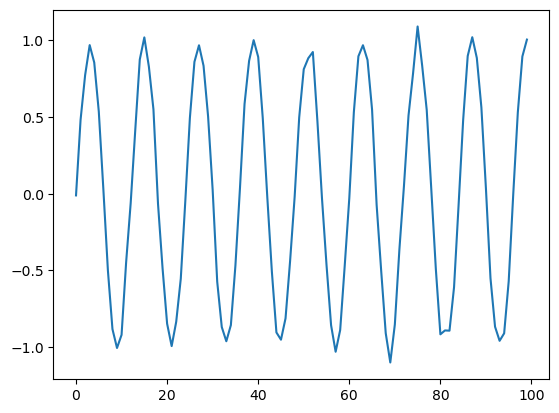

In [24]:
plt.plot(yi)

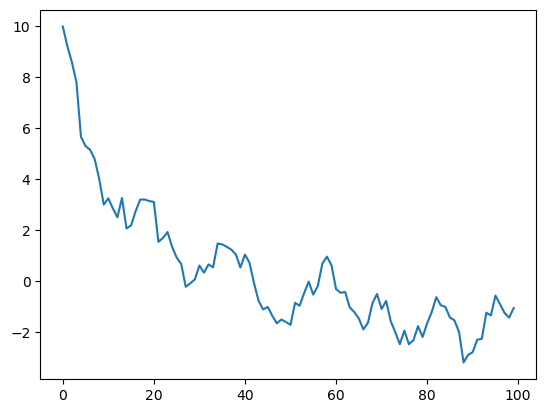

In [25]:
plt.plot(yii)

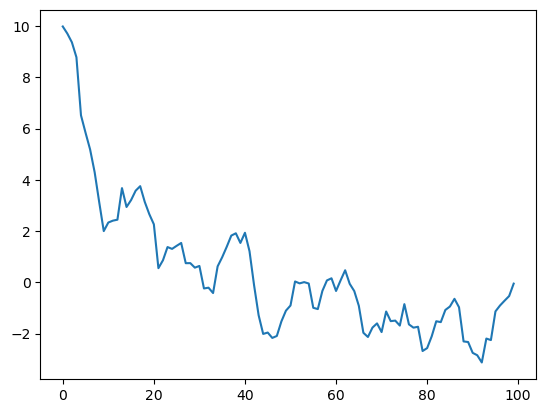

In [26]:
plt.plot(yiii)

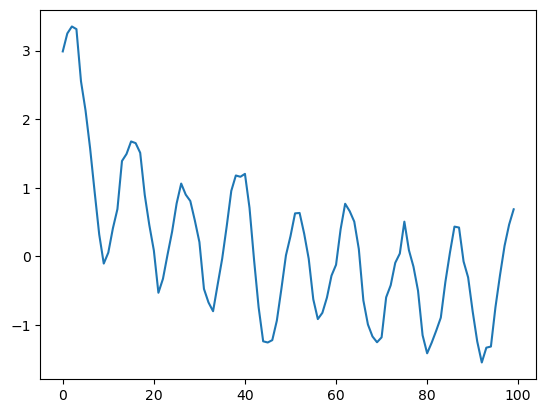

In [27]:
plt.plot(yvi)